# Neural Networks with PyTorch

## Problem 1 - Regression with NNs
To get started with PyTorch, we again consider the regression problem from the previous exercises.
Recall that are using no activation function (i.e., the identity function) at the output layer and a quadratic loss function.
We are going to use one-dimensional dataset: **dataset2_linreg.py**. 
The inputs in the dataset are organized as a matrix:
\begin{align}
\begin{bmatrix}
&{x}_1 &\dots &{x}_N
\end{bmatrix},
\end{align}
and the output in the dataset are organized as a matrix: 
\begin{align}
\begin{bmatrix}
&y_1 &\dots &y_N
\end{bmatrix}.
\end{align}
We start by importing the relevant modules and plotting the dataset.

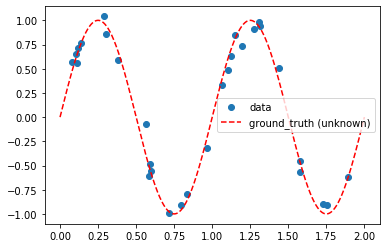

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

from dataset2_linreg import DataSet  

# fix random seed for reproducability
torch.manual_seed(1)
#get and plot the data
y_D,x_D = DataSet.get_data()
DataSet.plot_data()
plt.show()

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Right now, our training samples `x_D` and labels `y_D` are numpy arrays. To use them in PyTorch, we need to convert them to `torch.tensors`. To do this, you can use the `torch.from_numpy` function.

Next, create a dataset using `torch.utils.data.TensorDataset(inputs,targets)`. Note that in a `TensorDataset`, the data samples are indexed via the first dimension (i.e., the rows of a matrix)!

Using the dataset, create a `DataLoader` object. The DataLoader manages the data set for training (or validation) and we can extract the training batches from it during training. It can also take care of randomizing the samples across training epochs such that the training batches do not contain the same data in every epoch.
Since our dataset is small, we perform batch learning, i.e., we copmute the gradient over the whole data set in each iteration.

In [0]:
#torch.utils.data.TensorDataLoader?
#enumerate?

In [0]:
# convert x_D, y_D to tensors
y_tensor = torch.from_numpy(y_D.T).float()   #因为通过行来索引，所以需要转置
x_tensor = torch.from_numpy(x_D.T).float()
# build a data set
dataset_LinReg = torch.utils.data.TensorDataset(x_tensor, y_tensor)    #TensorDataset
dataloader_LinReg = torch.utils.data.DataLoader(dataset_LinReg, batch_size=len(dataset_LinReg))     #DataLoader


Now we can build a neural network. Similar to our previous exercise, a neural network is defined as a class in PyTorch. The difference is that in PyTorch, it is a child class which inherits many useful properties and attributes without the need to program them specifically.

For a simple feedforward neural network, we only need to code the learnable parameters (the weights and biases) and the forward computation of the network. For a fully connected linear layer, use `nn.Linear` and make sure to include a bias term.
For the ReLU function, use `F.relu` and for the sigmoid activation function, use `torch.sigmoid`.

In [0]:
class Net(nn.Module):
    # initialize the network and define all learnable parameters
    def __init__(self):
        super(Net, self).__init__() # initialize properties and methods from parent class
        
        ###### add layers here ######
        
        self.h1 = nn.Linear(1,8,bias=True)    # in_features=1, out_features=8
        self.h2 = nn.Linear(8,8,bias=True)
        self.h3 = nn.Linear(8,8,bias=True)
        self.h4 = nn.Linear(8,1,bias=True)
        
        #############################
        
    # define the forward pass
    def forward(self, x):
        
        ###### code the forward computation ########
        
        x = F.relu(self.h1(x))     # First hidden layer
        x = F.relu(self.h2(x))    # Second hidden layer
        x = torch.sigmoid(self.h3(x))    # Output layer
        a = self.out(x)             # Output layer
        
        #############################
        return a


We can now initialize the network and print its layer architecture.






In [10]:
net_LinReg = Net()
print(net_LinReg,'\n')

Net(
  (h1): Linear(in_features=1, out_features=8, bias=True)
  (h2): Linear(in_features=8, out_features=8, bias=True)
  (h3): Linear(in_features=8, out_features=8, bias=True)
  (h4): Linear(in_features=8, out_features=1, bias=True)
) 



We plot the model again and look see the predictions of our random network.

AttributeError: ignored

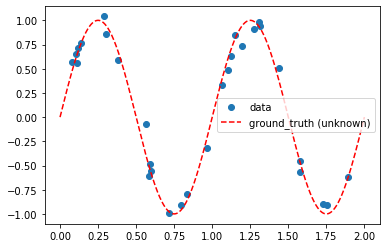

In [11]:
DataSet.plot_model_torch(net_LinReg)    # 'Net' object has no attribute 'out'?

Implement a function that trains the neural network.

In [0]:
def train(NeuralNetwork,dataloader,loss_function, num_epochs, l_rate=0.001, wd=0 ):
    """
    Performs gradient descent learning.
    
    NeuralNetwork = neural network to be trained
    dataloader = DataLoader that deals batches for mini-batch learning
    loss_function = cost function to be optimized
    num_epochs = number of training epochs
    l_rate = learning rate (default value 0.001)
    wd = weight decay regularization (default value 0)
    """
    optimizer = torch.optim.SGD(NeuralNetwork.parameters(), lr = l_rate, weight_decay=wd)
    for epoch in range(num_epochs):
        running_loss = 0.0
        
        for batch_idx, (inputs,labels) in enumerate(dataloader,0):

            ##### perform learning ######
            optimizer.zero_grad()    # reset gradient
            
            outputs = NeuralNetwork(inputs)  # forward propagation
            
            loss = loss_function(outputs, labels)  # compute loss

            loss.backward()   # backprop

            optimizer.step()   # update parameters

            running_loss += loss.item()   # add loss
            ##### Plot Error ######
        if (epoch % 1000) == 0:
            print('Epoch: ',epoch, 'Current loss: ',running_loss)
    

Now it's time to train the network! You can experiment with different learning rates or revalues. To speed up the learning process, it is often usefull to start with a larger learning rate and then continue training with a smaller rate.
After training, plot the model.

In [13]:
## training
train(net_LinReg,dataloader_LinReg,nn.MSELoss(),15000, 0.2)
train(net_LinReg,dataloader_LinReg,nn.MSELoss(),10000, 0.05)

## visualization
DataSet.plot_model_torch(net_LinReg)

AttributeError: ignored

Let us plot the model again.

## Problem 2 - Binary Classification wtih NNs

In this exercises we apply NN to the binary classification (logistic regression) problem. We will be using the file **dataset2_logreg.py**. For the binary classification we are going to use the cross entropy cost function between the network output $a$ and the output variable from the training set $y$.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from dataset2_logreg import DataSet  

# fix random seed for reproducability
torch.manual_seed(1)

#get and plot the data
y_D,x_D = DataSet.get_data()
DataSet.plot_data()
plt.show()


Convert the data to `torch.tensors` and create a suitable `DataLoader` object

In [0]:
## convert x_D,y_D to tensors
# y_tensor = ...
# x_tensor = ...

# build a data set
# dataset_LogReg = ...
# dataloader_LogReg = ...



Design a neural network for the classification problem. To make things more flexible, you should build a model that takes as inputs a tuple `layer_sizes` specifying the number of neurons in every layer as well an activation function for the hidden layers and the output layer.
As an exmaple, `net_LogReg = Net_var((2,10,10,1), F.relu, torch.sigmoid)` should initialize a neural network for our two-dimensional data that has two hidden layers with ten neurons each, one neuron at the output, and uses the ReLu function at the hidden layers and the sigmoid at the output.

In [0]:
def identity(x):
    return x

class Net_var(nn.Module):
    """
    Neural Network with inputs:
    layer_sizes = tuple specifying the number of neurons in each layer
    act_hid = activation function at the hidden layers
    act_out = activation function at the output
    """
    # initialize the network and define all learnable parameters
    def __init__(self, layer_sizes, act_hid, act_out): #, act_hid, act_out):
        super(Net_var, self).__init__()
        #### your code here ########
        
        
        
        
        #############################

    # define the forward pass
    def forward(self, x):
        #### your code here ########
        
        
        
        
        #############################
        return x



Initialize the network.

In [0]:
#net_LogReg = ....

Perform training and plot the model. Use the binary cross entropy function `nn.BCELoss` for trainig. For a better evaluation of our model, you can also modify the `train` function to compute the classification error rate.

In [0]:
# training
# train( ... )
# plot the model
DataSet.plot_decision_boundary_torch(net_LogReg)
plt.show()